# Homework 3, Part 2: Matrices (25 points)

## Step 2.1: Simple image manipulation

Your task is to write a function `convert_to_grayscale(image, crop_left, crop_bottom, crop_right, crop_top, contrast_scale)` that, given a color image array, returns a grayscale, cropped, new copy of the image with increased contrast.
 
Perform the steps in the following order:

1. *Cropping*:  you should crop the image appropriately according to the `crop_left, crop_bottom, crop_right`, and `crop_top` parameters (which you can safely assume will be non-negative).


2. *Converting to grayscale*:  you should average (compute the mean) of the $(R, G, B)$ values associated with each pixel.  For example, an RGB pixel $(100, 108, 104)$ would become the single grayscale value 104.  This has the effect of reducing the dimension of the image array from 3D (x,y,channel) to 2D (x,y).


3. *Increasing contrast*:  you should first compute the *median* grayscale pixel value across the entire image.  For every pixel with value *below* the median, scale its grayscale value down by the percentage specified in `contrast_scale` (which should be a real value from 0 to 1).  For every pixel with value *above* the median, scale its grayscale value up by the percentage specified in `contrast_scale`.  A `contrast_scale` of 0 corresponds to not changing the grayscale pixel values at all.  Do not let grayscale values fall outside of the range $[0, 255]$; you may need to threshold them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# TODO: Write your image conversion function here
# Worth 12 points
try:
    #intialize x to later compare
    x = 0
    def convert_to_grayscale(image, crop_left, crop_bottom, crop_right, crop_top, contrast_scale):
#         cropped_image = image[, crop_top : -crop_bottom]
        cropped_image = image[crop_top : -crop_bottom, crop_left : -crop_right]
        #specify axis = 2 to calculate mean of the 3rd channel
        gray_image = np.mean(cropped_image, axis =2)
        
        #without any specification, the grayscale will return a scalar
        grayscale_median = np.median(gray_image)
        print(gray_image.shape)
        #specify the width and length of the image
        length, width = gray_image.shape
        if contrast_scale == 0:
            return gray_image
        else:
            global x
            for i in range(length):
                for j in range(width):
                    if gray_image[i,j] < grayscale_median:
                        gray_image[i,j] = gray_image[i,j] * (1 - contrast_scale)
                    else:
                        x = gray_image[i,j] *(1 + contrast_scale)
                        if x > 255:
                            gray_image[i,j] = 255
                        else:
                            gray_image[i,j] = x
        return gray_image

# YOUR CODE HERE
except:
    raise NotImplementedError()

In [3]:
# Simple test
data = plt.imread('data-behind-everything.jpg')
gray_data = convert_to_grayscale(data, 10, 50, 10, 45, 0.3)

print(gray_data)

(535, 1180)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


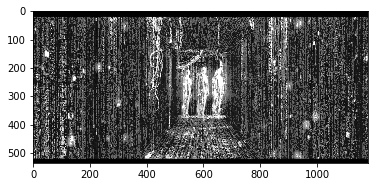

In [4]:
plt.imshow(gray_data, cmap=plt.cm.gray)

## Step 2.2 The term-document matrix

_This part is adapted from data in:_

Landauer, T. K., Foltz, P. W., \& Laham, D. (1998). An introduction to latent semantic analysis.  
_Discourse processes, 25_(2-3), 259-284.

Consider the following 5 documents on human-(c)omputer interaction and 4 documents on (m)athematical graph theory.  
We will focus on the _italicized_ words.

**c1:** _Human_ machine _interface_ for ABC _computer_ applications  
**c2:** A _survey_ of _user_ opinion of _computer system response time_  
**c3:** The _EPS user interface_ management _system_  
**c4:** _System_ and _human system_ engineering testing of _EPS_  
**c5:** Relation of _user_ perceived _response time_ to error measurement  

**m1:** The generation of random, binary, ordered _trees_  
**m2:** The intersection _graph_ of paths in _trees_  
**m3:** _Graph minors_ IV: Widths of _trees_ and well-quasi-ordering  
**m4:** _Graph minors_: A _survey_  

Generate the term-document matrix for this dataset as a Pandas DataFrame, ignoring uppercases and plurals.  
Order the words based on their first appearances in the dataset.

In [26]:
# TODO: create the docs_df DataFrame in this cell
# Worth 20 points
try:
    document = {"c1": "Human machine interface for ABC computer applications",
               "c2": "A survey of user opinion of computer system response time",
                "c3": "The EPS user interface management system",
                "c4": "System and human system engineering testing of EPS",
                "c5": "Relation of user perceived response time to error measurement",
                "m1": "The generation of random, binary, ordered trees",
                "m2": "The intersection graph of paths in trees",
                "m3": "Graph minors IV: Widths of trees and well-quasi-ordering",
                "m4": "Graph minors: A survey"
               }
    terms = ['human','interface','computer','survey','user','system','response','time','eps','trees','graph','minor']
#     terms = ['human', 'interface','computer','survey', 'user','system','time','eps','response','tree','graph','minor']
    docs_df = pd.DataFrame(terms,columns =['Term'])
    temp_df = pd.DataFrame(columns = ['c1','c2','c3','c4','c5','m1','m2','m3','m4'])
    docs_df = docs_df.join(temp_df).fillna(0).set_index('Term')
    for key in document.keys():
        split_sentence = document[key].split()
        for word in split_sentence:
            for term in terms:
                if term.lower() in word.lower():
                    docs_df[key][term] +=1
    print(docs_df)
                
# YOUR CODE HERE
except:
    raise NotImplementedError()

           c1  c2  c3  c4  c5  m1  m2  m3  m4
Term                                         
human       1   0   0   1   0   0   0   0   0
interface   1   0   1   0   0   0   0   0   0
computer    1   1   0   0   0   0   0   0   0
survey      0   1   0   0   0   0   0   0   1
user        0   1   1   0   1   0   0   0   0
system      0   1   1   2   0   0   0   0   0
response    0   1   0   0   1   0   0   0   0
time        0   1   0   0   1   0   0   0   0
eps         0   0   1   1   0   0   0   0   0
trees       0   0   0   0   0   1   1   1   0
graph       0   0   0   0   0   0   1   1   1
minor       0   0   0   0   0   0   0   1   1


In [27]:
if docs_df.shape != (12, 9):
    raise ValueError('unexpected dimensions')


In [28]:
if docs_df.columns[0] != "c1":
    raise ValueError('unexpected column name')


In [29]:
if docs_df.columns[1] != "c2":
    raise ValueError('unexpected column name')


In [30]:
if docs_df.columns[2] != "c3":
    raise ValueError('unexpected column name')


In [31]:
if docs_df.columns[3] != "c4":
    raise ValueError('unexpected column name')


In [32]:
if docs_df.columns[4] != "c5":
    raise ValueError('unexpected column name')


In [33]:
if docs_df.columns[5] != "m1":
    raise ValueError('unexpected column name')


In [34]:
if docs_df.columns[6] != "m2":
    raise ValueError('unexpected column name')


In [35]:
if docs_df.columns[7] != "m3":
    raise ValueError('unexpected column name')


In [36]:
if docs_df.columns[8] != "m4":
    raise ValueError('unexpected column name')


## 4.3 Matrix evaluation metrics

Write a function `matrix_eval` that returns the Frobenius norm, the determinant, the rank, the eigenvalues, and the singular values of a given matrix as a 5-tuple. If the metric is not defined, return `nan` or `[nan]` for that metric, as appropriate.

In [57]:
# TODO: write the matrix_eval function in this cell
# Worth 8 points
try:

    def matrix_eval(matrix):
        global eigenvalues
        matrix_shape = matrix.shape
        rank = np.linalg.matrix_rank(matrix)
        fnorm = np.linalg.norm(matrix)
        v,singular_value,r_v = np.linalg.svd(matrix)

    
        #if it is not a square matrix, then eigenvalues and determinant are nonexistent
        if matrix_shape[0] != matrix_shape[1]:
            determinant = np.nan
            eigenvalues = [np.nan]
        else:
            determinant = np.linalg.det(matrix)
            eigenvalues, eigvec = np.linalg.eig(matrix)
        
        return (fnorm, determinant, rank, list(eigenvalues), list(singular_value))

            
# YOUR CODE HERE
except:
    raise NotImplementedError()

In [58]:
A = np.array(docs_df)

metrics = matrix_eval(A)
metrics


(5.5677643628300215,
 nan,
 9,
 [nan],
 [3.340883752133065,
  2.5417010000416296,
  2.3539435176648396,
  1.6445322923722552,
  1.504831550488629,
  1.3063819502352236,
  0.8459030826472838,
  0.5601344228392209,
  0.3636768400396495])

In [59]:
matrix_eval(A[:9, :])


(4.795831523312719,
 0.0,
 6,
 [0j,
  0j,
  0j,
  (1+0j),
  (-1+0j),
  (2.0000000000000027+0j),
  (0.5000000000000002+0.8660254037844388j),
  (0.5000000000000002-0.8660254037844388j),
  (-1.0000000000000002+0j)],
 [3.338857056069332,
  2.376272789028976,
  1.6444672712431307,
  1.4142135623730951,
  1.0939639046102734,
  0.5516625422090227,
  0.0,
  0.0,
  0.0])

In [60]:
matrix_eval(A @ A.T)


(14.594519519326424,
 0.0,
 9,
 [(11.161504245266716+0j),
  (6.4602439736126165+0j),
  (5.541050084356324+0j),
  (2.7044864606551458+0j),
  (2.2645179953460106+0j),
  (1.7066337999003873+0j),
  (0.7155520252321748+0j),
  (0.313750571649427+0j),
  (0.1322608439812246+0j),
  (-2.2361830013945166e-16+0j),
  (1.545835730001198e-16+3.711071832487264e-17j),
  (1.545835730001198e-16-3.711071832487264e-17j)],
 [11.161504245266704,
  6.460243973612616,
  5.541050084356324,
  2.7044864606551435,
  2.264517995346009,
  1.7066337999003858,
  0.715552025232176,
  0.3137505716494273,
  0.13226084398122484,
  3.5637965974392165e-16,
  4.6352907558903256e-17,
  1.382726587045302e-17])

In [61]:
matrix_eval(A.T @ A)


(14.594519519326424,
 124.00000000000014,
 9,
 [11.161504245266709,
  6.460243973612617,
  5.541050084356326,
  2.7044864606551404,
  2.2645179953460097,
  1.706633799900384,
  0.7155520252321775,
  0.13226084398122556,
  0.3137505716494271],
 [11.161504245266704,
  6.460243973612616,
  5.541050084356321,
  2.704486460655142,
  2.2645179953460106,
  1.7066337999003869,
  0.715552025232175,
  0.3137505716494272,
  0.13226084398122473])

## 4.4 Matrix approximation

Write a function `approx_matrix` that approximates a matrix using the first `n` singular values, given `n`. Return the loss, defined as the Frobenius norm of the original minus the approximated version, divided by the Frobenius norm of the original.

In [65]:
# TODO: create the approx_matrix function here
# Worth 10 points
try:
    def approx_matrix(matrix, n):
        #define the matrix shape
        lx, ly = matrix.shape
        u,s,v_1 = np.linalg.svd(matrix)
        #sigma matrix created, should have the same dimension as the original matrix
        sigma_matrix = np.zeros((lx,ly)) #create mxn sigma matrix
        sigma_matrix[ : ly, : ly] = np.diag(s) #create nxn matrix with values of diagonal vectors from s
        sigma_matrix = sigma_matrix[:,:n] #the first n singular values
        #v_1: transpose of matrix v with n rows
        v_1 = v_1[:n,:]
        approx_matrix = u.dot(sigma_matrix.dot(v_1))
        loss_func = np.linalg.norm(approx_matrix-matrix)/(np.linalg.norm(matrix))
        return loss_func
        
        
# YOUR CODE HERE
except:
    raise NotImplementedError()

In [66]:
simple = np.array([[1,2],[3,4]])
approx_matrix(simple, 1)


0.0668159792967457

In [67]:
approx_matrix(simple, 2)


2.465928387256741e-16